In [14]:
!pip install fastai --upgrade

Requirement already up-to-date: fastai in /opt/conda/lib/python3.6/site-packages (2.2.5)


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision.all import *

In [16]:
train_dir = 'working/train_set/'
val_dir = 'working/val_set/'

In [17]:
train_df = pd.read_csv('../input/ifood-2019-fgvc6/train_labels.csv')
train_df['path'] = train_df['img_name'].map(lambda x: os.path.join(train_dir,x))
val_df = pd.read_csv('../input/ifood-2019-fgvc6/val_labels.csv')
val_df['path'] = val_df['img_name'].map(lambda x: os.path.join(val_dir,x))

In [51]:
val_df['is_valid'] = True

In [55]:
df = pd.concat([train_df, val_df], axis=0, ignore_index=True, sort=False)
df.head()

,img_name,label,path,is_valid
0,train_101733.jpg,211,working/train_set/train_101733.jpg,NaN
1,train_101734.jpg,211,working/train_set/train_101734.jpg,NaN
2,train_101735.jpg,211,working/train_set/train_101735.jpg,NaN
3,train_101736.jpg,211,working/train_set/train_101736.jpg,NaN
4,train_101737.jpg,211,working/train_set/train_101737.jpg,NaN


In [58]:
df = df.fillna(False)

In [59]:
df.sample(5)

,img_name,label,path,is_valid
3542,train_105368.jpg,218,working/train_set/train_105368.jpg,False
375,train_102110.jpg,211,working/train_set/train_102110.jpg,False
24453,train_006311.jpg,40,working/train_set/train_006311.jpg,False
42227,train_024369.jpg,7,working/train_set/train_024369.jpg,False
75459,train_058074.jpg,141,working/train_set/train_058074.jpg,False


In [76]:
df.shape

(130469, 4)

In [60]:
classes = pd.DataFrame(df.label.value_counts()[:5]).index.values

In [61]:
classes

array([  0, 155, 218, 147, 119])

In [62]:
df[df.label.isin(classes)].label.value_counts()

0      688
155    686
147    686
218    686
119    676
Name: label, dtype: int64

In [63]:
new_df = df[df.label.isin(classes)]

In [77]:
new_df.shape

(3422, 4)

In [64]:
val_idx = [i for i in range(len(train_df), len(df))]

In [65]:
sz = 256
bs = 124

In [27]:
!ls ../input/ifood-2019-fgvc6

class_list.txt			 test_set.zip	   val_labels.csv
ifood2019_sample_submission.csv  train_labels.csv  val_set.zip
sample_submission.csv		 train_set.zip


In [33]:
!unzip -q -o ../input/ifood-2019-fgvc6/train_set.zip

In [34]:
!unzip -q -o ../input/ifood-2019-fgvc6/val_set.zip

In [35]:
!ls /kaggle/working/

__notebook_source__.ipynb  train_set  val_set


In [66]:
new_train_df = train_df[train_df.label.isin(classes)]

In [73]:
train_idx = [i for i in range(len(new_train_df))]
val_idx = [i for i in range(len(new_train_df), len(new_df))]

In [80]:
train_idx[-1], val_idx[0]

(3171, 3172)

In [75]:
len(train_idx), len(val_idx)

(3172, 250)

In [68]:
new_df.head()

,img_name,label,path,is_valid
3080,train_104903.jpg,218,working/train_set/train_104903.jpg,False
3081,train_104904.jpg,218,working/train_set/train_104904.jpg,False
3082,train_104905.jpg,218,working/train_set/train_104905.jpg,False
3083,train_104906.jpg,218,working/train_set/train_104906.jpg,False
3084,train_104907.jpg,218,working/train_set/train_104907.jpg,False


In [81]:
data = DataBlock(blocks= (ImageBlock, CategoryBlock),
                splitter=ColSplitter(3),
                get_x=ColReader(2, pref='/kaggle/'),
                get_y=ColReader(1),
                item_tfms=Resize(224),
                batch_tfms=aug_transforms())

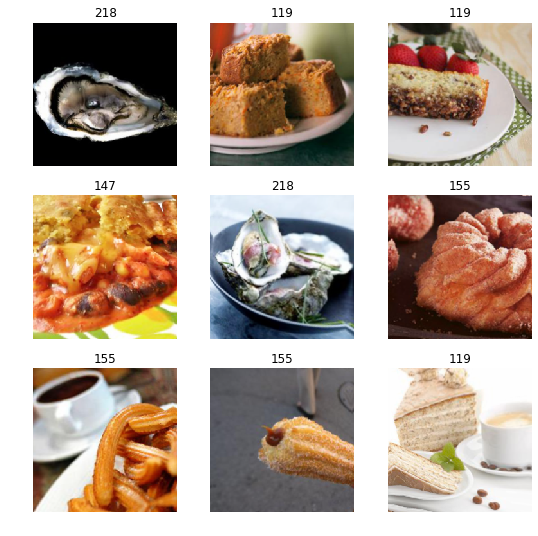

In [82]:
dls = data.dataloaders(new_df)
dls.show_batch()

In [69]:
#tfms = aug_transforms(do_flip=True,flip_vert=True,max_rotate=360,max_warp=0,max_zoom=1.2,max_lighting=0.5,p_lighting=0.5, p_affine=0.5)

Could not do one pass in your dataloader, there is something wrong in it


In [83]:
learn = cnn_learner(dls, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [84]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.340142,0.330262,0.128000,00:16
1,0.777811,0.218297,0.076000,00:14
2,0.561431,0.215430,0.076000,00:15
3,0.458122,0.212323,0.072000,00:14


SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=4.786300905834651e-06)

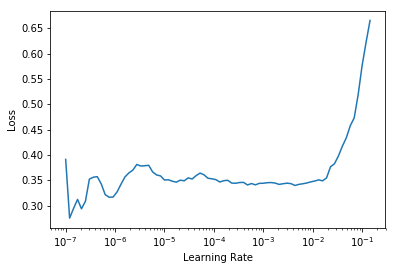

In [85]:
learn.lr_find()

In [86]:
learn.fit_one_cycle(6, 7e-8)

epoch,train_loss,valid_loss,error_rate,time
0,0.373579,0.211872,0.072000,00:15
1,0.384629,0.211797,0.072000,00:15
2,0.390945,0.215586,0.072000,00:15
3,0.370003,0.214209,0.076000,00:15
4,0.377095,0.213478,0.072000,00:15
5,0.369392,0.215371,0.068000,00:15


In [87]:
learn.fit_one_cycle(6, 7e-8)

epoch,train_loss,valid_loss,error_rate,time
0,0.362492,0.209083,0.068000,00:14
1,0.380550,0.212618,0.068000,00:15
2,0.377126,0.211951,0.072000,00:15
3,0.365733,0.205123,0.068000,00:15
4,0.361533,0.211468,0.072000,00:15
5,0.368528,0.212914,0.072000,00:15


In [88]:
learn.save('beforeUnFreeze')

Path('models/beforeUnFreeze.pth')

In [169]:
learn.load('beforeUnFreeze')

Learner(data=ImageDataBunch;

Train: LabelList (3172 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
218,218,218,218,218
Path: /kaggle;

Valid: LabelList (250 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
218,218,218,218,218
Path: /kaggle;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (re

SuggestedLRs(lr_min=5.248074739938602e-06, lr_steep=2.75422871709452e-06)

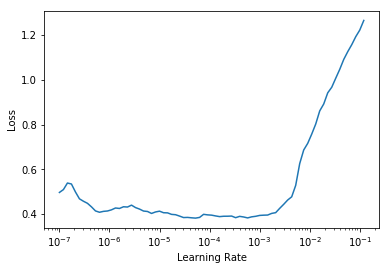

In [89]:
learn.unfreeze()
learn.lr_find()

In [90]:
learn.fit_one_cycle(6, slice(5e-05, 5e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.393586,0.198755,0.064000,00:16
1,0.362628,0.194457,0.056000,00:15
2,0.311741,0.164664,0.056000,00:16
3,0.262850,0.161949,0.056000,00:16
4,0.239388,0.168281,0.052000,00:16
5,0.208874,0.157877,0.052000,00:16


In [91]:
learn.save('unfrozen')

Path('models/unfrozen.pth')

# Testing

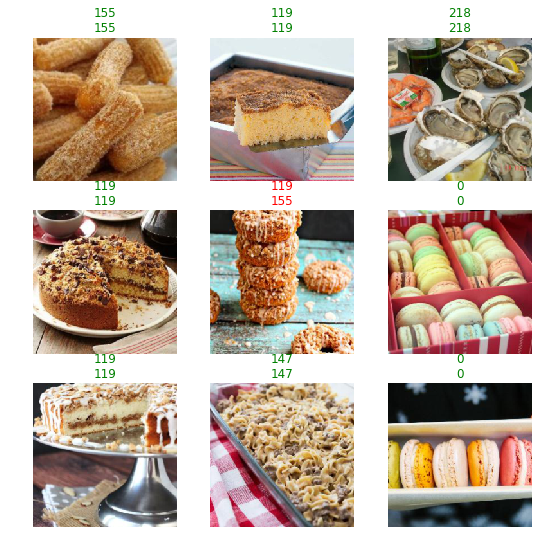

In [92]:
learn.show_results()

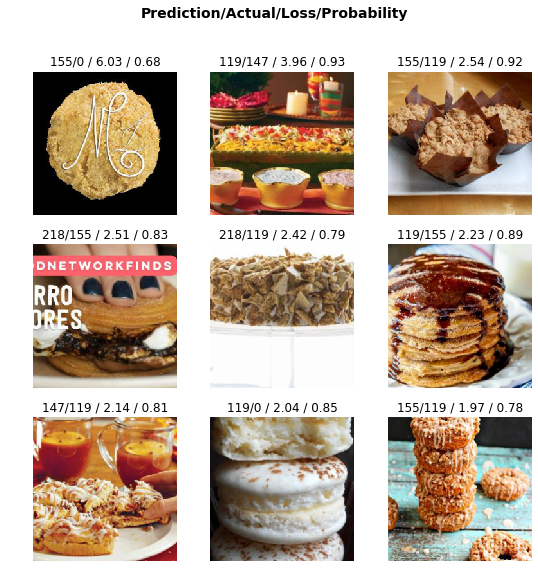

In [93]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

# Making prediction
- Loading weights 
- preprocessing the input image
- getting the prediction

In [7]:
learn = load_learner('export.pkl', cpu=False)

In [10]:
learn.predict('Huitre.jpg')

('218',
 tensor(4),
 tensor([2.1732e-05, 7.3653e-05, 3.5518e-03, 2.1108e-04, 9.9614e-01]))